<a href="https://colab.research.google.com/github/Bruno-yano/Atividades-IAMA/blob/main/Atividade_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
!wget http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat

--2024-09-12 22:44:47--  http://helon.usuarios.rdc.puc-rio.br/data/data3SS2009.mat
Resolving helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)... 139.82.34.12
Connecting to helon.usuarios.rdc.puc-rio.br (helon.usuarios.rdc.puc-rio.br)|139.82.34.12|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 267634147 (255M)
Saving to: ‘data3SS2009.mat.1’

data3SS2009.mat.1   100%[===================>] 255.24M  17.0MB/s    in 16s     

2024-09-12 22:45:04 (16.0 MB/s) - ‘data3SS2009.mat.1’ saved [267634147/267634147]



In [15]:
#imports das bibliotecas
import scipy.io as sio
import numpy as np
import os
from os import getcwd
from os.path import join
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

#novas bibliotecas para atividade 4
import numpy as np
from scipy import stats
from scipy.stats.stats import mode
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (train_test_split, RepeatedKFold,
RandomizedSearchCV)
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
#Novas bibliotecas para atividade 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#Novas bibliotecas para atividade 6
from sklearn.cluster import KMeans
from sklearn.preprocessing import FunctionTransformer
from sklearn.svm import OneClassSVM
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
#Novas bibliotecas para atividade 7
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential


<ipython-input-15-29b640bc3e6b>:15: DeprecationWarning: Please import `mode` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import mode


In [16]:
#chamada do banco de dados
fname = join(getcwd(),'data3SS2009.mat')

mat_contents = sio.loadmat(fname)

dataset = mat_contents['dataset']

N, Chno, Nc = dataset.shape

#extração de caracteristicas

Na = 30 #Ordem da função de regressão
FeatArch2 = []
FeatArch3 = []
FeatArch4 = []
FeatArch5 = []
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar

y = mat_contents['labels'].reshape(Nc)
y_target = y > 9 #criacao de uma matriz targets
print(y_target.shape)
print(y_target)

(850,)
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False F

In [17]:
#extração de caracteristicas
Na = 30 #Ordem da função de regressão
FeatArch2 = []
FeatArch3 = []
FeatArch4 = []
FeatArch5 = []
Ch1 = dataset[:,0,:] # célula de carga: força do shaker
Ch2 = dataset[:,1,:] # acelerômetro: base
Ch3 = dataset[:,2,:] # acelerômetro: 1o andar
Ch4 = dataset[:,3,:] # acelerômetro: 2o andar
Ch5 = dataset[:,4,:] # acelerômetro: 3o andar
for i in range(Nc):
  res1 = AutoReg(Ch2[:,i], lags=Na, trend='n').fit()
  res2 = AutoReg(Ch3[:,i], lags=Na, trend='n').fit()
  res3 = AutoReg(Ch4[:,i], lags=Na, trend='n').fit()
  res4 = AutoReg(Ch5[:,i], lags=Na, trend='n').fit()

  FeatArch2.append(res1.params)
  FeatArch3.append(res2.params)
  FeatArch4.append(res3.params)
  FeatArch5.append(res4.params)

FeatArch2 = np.array(FeatArch2)
FeatArch3 = np.array(FeatArch3)
FeatArch4 = np.array(FeatArch4)
FeatArch5 = np.array(FeatArch5)
X1 = np.concatenate([FeatArch2,FeatArch3,FeatArch4,FeatArch5],axis=1) #Criação da matrix X1
X1.shape

(850, 120)

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(X1,y_target,test_size=0.3,random_state=20)

In [19]:
pca_x_train = PCA(n_components=3).fit_transform(X_train)
print(pca_x_train.shape)

(595, 3)


In [20]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(120,)),
  tf.keras.layers.Dense(64, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(32, activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(16,activation='softmax'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy', # For binary classification
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
epochs = 130
history = model.fit(X_train,Y_train, epochs=epochs, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)
predict_value = model.predict(X_test) # The values that the model predict are storaged here
# because the values represents the probability is necessary to make the values into 0 and 1
# in order to create the confusion matrix
predict_value = (predict_value > 0.5).astype(int) # Takes the values that model predict and transforms into 0 and 1 using 0.5 as a threshold
predict_value = predict_value > 0 # Transforms into true and false
print(predict_value.shape)
print(Y_test)
print(Y_test.shape)


Epoch 1/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4560 - loss: 0.7020 - val_accuracy: 0.5294 - val_loss: 0.6911
Epoch 2/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4536 - loss: 0.7011 - val_accuracy: 0.5294 - val_loss: 0.6904
Epoch 3/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5226 - loss: 0.6919 - val_accuracy: 0.5294 - val_loss: 0.6898
Epoch 4/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5580 - loss: 0.6908 - val_accuracy: 1.0000 - val_loss: 0.6885
Epoch 5/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6005 - loss: 0.6891 - val_accuracy: 0.4706 - val_loss: 0.6867
Epoch 6/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6411 - loss: 0.6827 - val_accuracy: 0.4706 - val_loss: 0.6835
Epoch 7/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5853 - loss: 0.6841 - val_accuracy: 0.4706 - val_loss: 0.6786
Epoch 8/130
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6480 - loss: 0.6733 - val_accuracy: 0.4706 - v

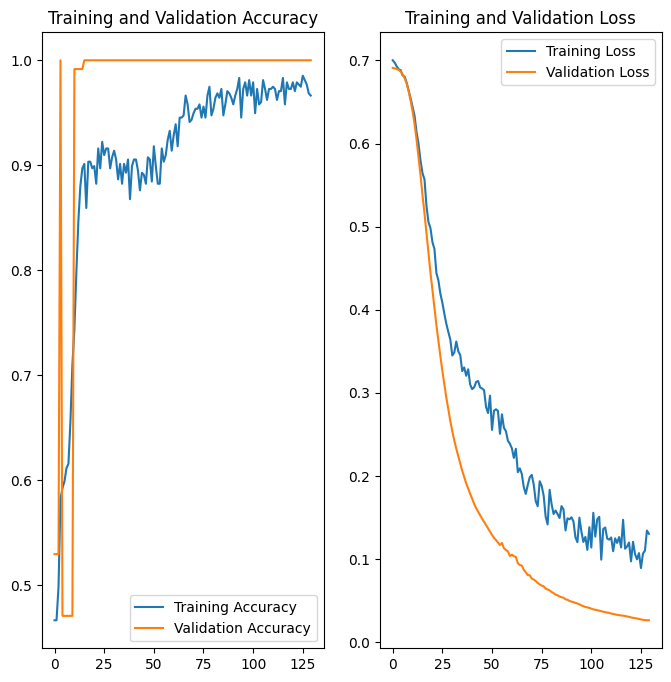

In [22]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

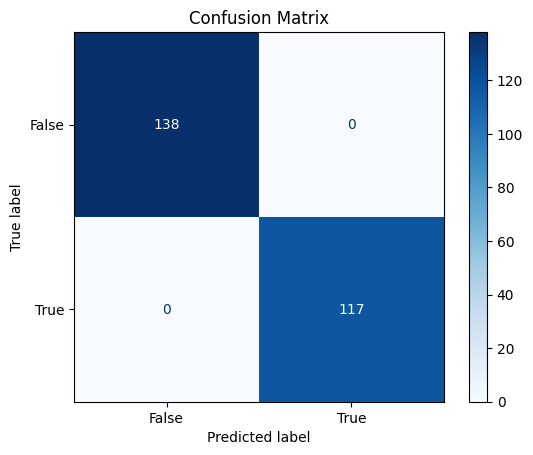

In [23]:
cm = confusion_matrix(Y_test,predict_value)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[False, True])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()